## Breast Cancer Prediction

Breast Cancer Preiction obiettivi del progetto quali sono Utilizzando il Breast Cancer Wisconsin (diagnostica) Database, possiamo creare un classificatore che può aiutare a diagnosticare i pazienti e prevedere la probabilità di un cancro al seno. Verranno esplorate alcune tecniche di apprendimento automatico.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

leggo il dataset

In [25]:
df = pd.read_csv('data.csv')
df.sample(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
164,8712289,M,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,...,28.22,184.20,2403.0,0.12280,0.35830,0.394800,0.23460,0.3589,0.09187,NaN
327,895299,B,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,NaN
409,905501,B,12.270,17.92,78.41,466.1,0.08685,0.06526,0.032110,0.026530,...,28.88,89.00,610.2,0.12400,0.17950,0.137700,0.09532,0.3455,0.06896,NaN
298,892214,B,14.260,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.013740,...,25.26,105.80,819.7,0.09445,0.21670,0.156500,0.07530,0.2636,0.07676,NaN
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,...,21.47,71.68,367.0,0.14670,0.17650,0.130000,0.05334,0.2533,0.08468,NaN
328,8953902,M,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.084880,...,30.38,129.80,1121.0,0.15900,0.29470,0.359700,0.15830,0.3103,0.08200,NaN
13,846381,M,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,...,27.66,112.00,876.5,0.11310,0.19240,0.232200,0.11190,0.2809,0.06287,NaN
115,864685,B,11.930,21.53,76.53,438.6,0.09768,0.07849,0.033280,0.020080,...,26.15,87.54,583.0,0.15000,0.23990,0.150300,0.07247,0.2438,0.08541,NaN
441,909445,M,17.270,25.42,112.40,928.8,0.08331,0.11090,0.120400,0.057360,...,35.46,132.80,1284.0,0.14360,0.41220,0.503600,0.17390,0.2500,0.07944,NaN
36,854268,M,14.250,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,...,30.36,116.20,799.6,0.14460,0.42380,0.518600,0.14470,0.3591,0.10140,NaN


numero righe e colonne del dataset

In [26]:
df.shape

(569, 33)

## Data Cleaning (rimozione valori nulli, duplicati)

stampo le info del dataset per fare una panoramica

In [27]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

controlliamo se ci sono valori nulli.

In [28]:
# Identifica le colonne con almeno un valore nullo
colonne_con_valori_nulli = df.columns[df.isnull().any()].tolist()

# Stampa le colonne con valori nulli
print("Colonne con valori nulli:")
print(colonne_con_valori_nulli)


Colonne con valori nulli:
['Unnamed: 32']


eliminiamo la colonna 32

In [29]:
df.drop(columns=['Unnamed: 32'], inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

La prima cosa da fare è di enumerare la colonna di diagnosi tale che M = 1, B = 0. In questo modo possono essere usati come input per algoritmi di ml.

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


controllo se sono presenti valori nulli.

In [31]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

non ci sono valori nulli, verifico se ci sono duplicati.

In [32]:
df.duplicated().sum()

0

non ci sono duplicati.

## Data Undestanding

fase in cui i dati vengono esplorati, visualizzati e compresi per scoprire informazioni rilvenanti ,tendenze, relazioni e anomalie nei dati.

In [33]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

quindi il mio dataset ha 357 cellule maligne e 212 benigne.

vado a rappresentare tali informazioni usando un grafico a torta

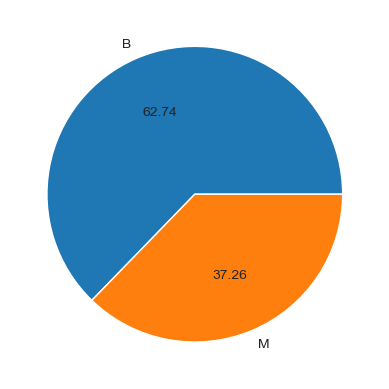

In [34]:
plt.pie(df['diagnosis'].value_counts(), labels=['B', 'M'], autopct="%0.2f")
plt.show()

Ora stampo un grafico riassuntivo, un pairplot. In un pairplot, ciascuna variabile numerica presente nel dataset viene confrontata con tutte le altre variabili numeriche tramite grafici a dispersione, quindi consentono di visualizzare e individuare eventuali relazioni o tendenze tra le variabili.

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


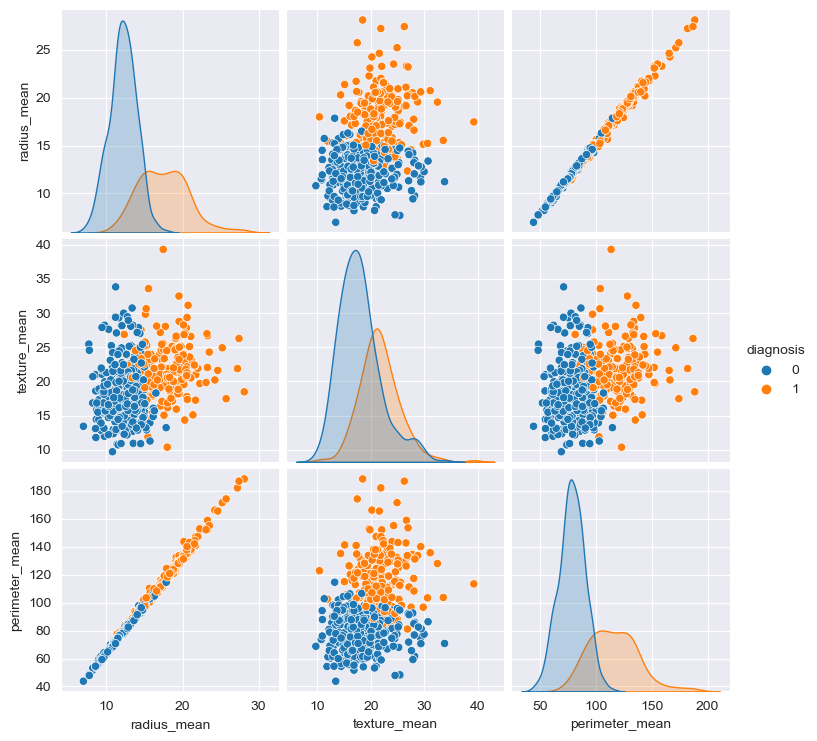

In [36]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

emerge dal pairplot:
scrivi qualcosa...

Vado a visualizzare gli stessi dati con la matrice di correlazione, che mi restituisce le correlazioni tra le variabili del dataset.

In [37]:
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


vado a rappresentare tali valori con una heatmap che utilizza colori per visualizzare i valori dei coefficienti di correlazione tra le diverse coppie di variabili nel dataset, consentendo di individuare facilmente relazioni tra di esse.
All'interno della mappa:
- Le celle più scure o più chiare indicano correlazioni più forti o più deboli, rispettivamente. 
- le variabili che sono fortemente correlate tra loro (valori vicini a 1 o -1) o variabili che hanno una bassa correlazione (valori vicini a 0).

<Axes: >

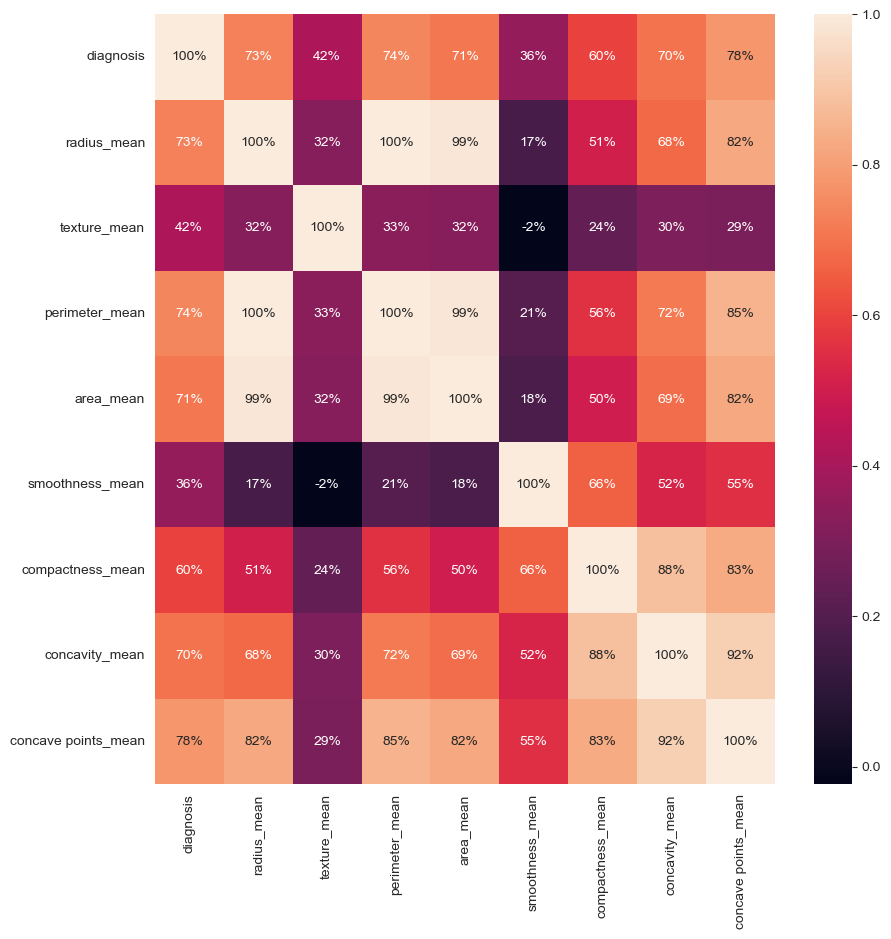

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True, fmt=".0%")


Dalla heatmap emergono svariate considerazioni facilemente spiegabili: 
- scrivere cos

## Data preparation(Feature scaling)